In [266]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "fitbit"

# 1. Summary****

Bellabeat is a high-tech company that manufactures health-focused smart products.They offer different smart devices that collect data on activity, sleep, stress, and reproductive health to empower women with knowledge about their own health and habits.

The main focus of this case is to analyze smart devices fitness data and determine how it could help unlock new growth opportunities for Bellabeat. We will focus on one of Bellabeat’s products: Bellabeat app.

The Bellabeat app provides users with health data related to their activity, sleep, stress, menstrual cycle, and mindfulness habits. This data can help users better understand their current habits and make healthy decisions. The Bellabeat app connects to their line of smart wellness products

# 2. Ask Phase****

**Business Task** 

Identify trends in how consumers use non-Bellabeat smart devices to apply insights into Bellabeat’s marketing strategy.

**Stakeholders**

* Urška Sršen - Bellabeat cofounder and Chief Creative Officer

* Sando Mur - Bellabeat cofounder and key member of Bellabeat executive team

* Bellabeat Marketing Analytics team

# 3. Prepare Phase****

**3.1** **Dataset used:** 
The data source used for our case study is FitBit Fitness Tracker Data. This dataset is stored in Kaggle and was made available through Mobius.

**3.2 Accessibility and privacy of data:** 
Verifying the metadata of our dataset we can confirm it is open-source. The owner has dedicated the work to the public domain by waiving all of his or her rights to the work worldwide under copyright law, including all related and neighboring rights, to the extent allowed by law. You can copy, modify, distribute and perform the work, even for commercial purposes, all without asking permission.

**3.3 Information about our dataset:**
These datasets were generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. Variation between output represents use of different types of Fitbit trackers and individual tracking behaviors / preferences.

**3.4 Data Organization and verification:** 
Available to us are 18 CSV documents. Each document represents different quantitative data tracked by Fitbit. The data is considered long since each row is one time point per subject, so each subject will have data in multiple rows.Every user has a unique ID and different rows since data is tracked by day and time.

Due to the small size of sample I sorted and filtered tables creating Pivot Tables in Excel. I was able to verify attributes and observations of each table and relations between tables. Counted sample size (users) of each table and verified time length of analysis - 31 days.

**3.5 Data Credibility and Integrity:**
Due to the limitation of size (30 users) and not having any demographic information we could encounter a sampling bias. We are not sure if the sample is representative of the population as a whole. Another problem we would encounter is that the dataset is not current and also the time limitation of the survey (2 months long). That is why we will give our case study an operational approach.

# 4. Process phase****

I will use R programming language for this analysis due to the accessibility, amount of data and to be able to create data visualization to share my results with stakeholders.

**4.1 Installing packages and opening libraries**
We will choose the packages that will help us on our analysis and open them. We will use the following packages for our analysis:
* library(tidyverse)
* library(lubridate)
* library(dplyr)
* library(ggplot2)
* library(tidyr)

In [267]:
library(tidyverse)
library(lubridate)
library(dplyr)
library(ggplot2)
library(tidyr)

**4.2 Importing datasets**

Knowing the datasets we have, we will upload the datasets that will help us answer our business task. On our analysis we will focus on the following datasets:
* daily_activity
* daily_sleep

In [268]:
daily_activity <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
daily_sleep <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")

**4.3. Use head() function to check data after importing**

We will preview our selected data frames and check the summary of each column.

In [269]:
head(daily_activity)
head(daily_sleep)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


**4.4. Cleaning Data**
After viewing the data frames, I have spotted that the date format should be fixed and formatted as per date format standard to be able to operate functions on it.

**4.4.1. Fixing Formatting**

Now that we have verified our column names and change them to lower case, we will focus on cleaning date-time format for daily_activity and daily_sleep since we will merge both data frames. Since we can disregard the time on daily_sleep data frame we are using as_date instead as as_datetime

In [270]:
daily_activity <- daily_activity %>%
  rename(date = ActivityDate) %>%
  mutate(date = as_date(date, format = "%m/%d/%Y"))
daily_sleep <- daily_sleep %>%
  rename(date = SleepDay) %>%
  mutate(date = as_date(date,format ="%m/%d/%Y %I:%M:%S %p" , tz=Sys.timezone()))

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `date = as_date(date, format = "%m/%d/%Y %I:%M:%S %p", tz =
  Sys.timezone())`.
Caused by warning:
! `tz` argument is ignored by `as_date()`”


**4.4.2. Removing Duplicates**

Knowing the length of our observations (daily_sleep 413) we are able to delete duplicates for daily_sleep.

In [271]:
daily_activity <- daily_activity %>%
  distinct() %>%
  drop_na()
daily_sleep <- daily_sleep%>%
distinct()%>%
drop_na()

Making sure duplicates have been removed

In [272]:
sum(duplicated(daily_activity))
sum(duplicated(daily_sleep))

[1] 0

[1] 0

Varifying the number of users

In [273]:
n_distinct(daily_activity$Id)
n_distinct(daily_sleep$Id)

[1] 33

[1] 24

**4.4.3. Summary of Data**

Before we analyze data, we get a summary of important variables.

In [274]:
daily_activity %>%  
  select(TotalSteps,
         TotalDistance,
         SedentaryMinutes, Calories) %>%
  summary()
daily_sleep %>%
select(TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed) %>%
summary()

   TotalSteps    TotalDistance    SedentaryMinutes    Calories   
 Min.   :    0   Min.   : 0.000   Min.   :   0.0   Min.   :   0  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 729.8   1st Qu.:1828  
 Median : 7406   Median : 5.245   Median :1057.5   Median :2134  
 Mean   : 7638   Mean   : 5.490   Mean   : 991.2   Mean   :2304  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:1229.5   3rd Qu.:2793  
 Max.   :36019   Max.   :28.030   Max.   :1440.0   Max.   :4900  

 TotalSleepRecords TotalMinutesAsleep TotalTimeInBed 
 Min.   :1.00      Min.   : 58.0      Min.   : 61.0  
 1st Qu.:1.00      1st Qu.:361.0      1st Qu.:403.8  
 Median :1.00      Median :432.5      Median :463.0  
 Mean   :1.12      Mean   :419.2      Mean   :458.5  
 3rd Qu.:1.00      3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :3.00      Max.   :796.0      Max.   :961.0  

This summary provide us with the informationg regarding the range of data and how the data is distributed.

**4.4.4. Merging Data**

We will be merging both files daily_activity and daily_sleep to see any correlation between variables by using id and date as their primary keys.

In [275]:
daily_activity_sleep <- merge(daily_activity, daily_sleep, by=c ("Id", "date"))
glimpse(daily_activity_sleep)

Rows: 410
Columns: 18
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ date                     <date> 2016-04-12, 2016-04-13, 2016-04-15, 2016-04-…
$ TotalSteps               <int> 13162, 10735, 9762, 12669, 9705, 15506, 10544…
$ TotalDistance            <dbl> 8.50, 6.97, 6.28, 8.16, 6.48, 9.88, 6.68, 6.3…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.28, 8.16, 6.48, 9.88, 6.68, 6.3…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.14, 2.71, 3.19, 3.53, 1.96, 1.3…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 1.26, 0.41, 0.78, 1.32, 0.48, 0.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 2.83, 5.04, 2.51, 5.03, 4.24, 4.6…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <int> 25, 21, 29, 36, 38, 50, 28, 19, 41, 39, 73, 3…
$ FairlyActiveMinutes      <int> 13, 19, 34, 10, 20, 31, 12, 8, 21, 5, 14, 23,…
$ LightlyActiveMin

**4.4.5. Adding Sleep Quality variable to the table**

The quality of sleep refers to how well you sleep, rather than just how many hours you get. Key aspects of sleep quality are sleep latency, awakenings, Wake After Sleep Onset and Sleep Efficiency. Therefore, Sleep quality can be measured as the ratio of time spent asleep to time in bed. 

In [276]:
activity_sleep <- daily_activity_sleep %>% mutate(SleepQuality = TotalMinutesAsleep/TotalTimeInBed)
head(activity_sleep)

,Id,date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,SleepQuality
,<dbl>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,1,327,346,0.9450867
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,2,384,407,0.9434889
3,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,1,412,442,0.9321267
4,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,2,340,367,0.9264305
5,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,1,700,712,0.9831461
6,1503960366,2016-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035,1,304,320,0.9500000


In [277]:
head(activity_sleep)

,Id,date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,SleepQuality
,<dbl>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,1,327,346,0.9450867
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,2,384,407,0.9434889
3,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,1,412,442,0.9321267
4,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,2,340,367,0.9264305
5,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,1,700,712,0.9831461
6,1503960366,2016-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035,1,304,320,0.9500000


# 5. Analyze Phase and Share Phase****

# 5.1. Correlation

**5.1.1. Correlations between totaltimeinbed and sleep quality**

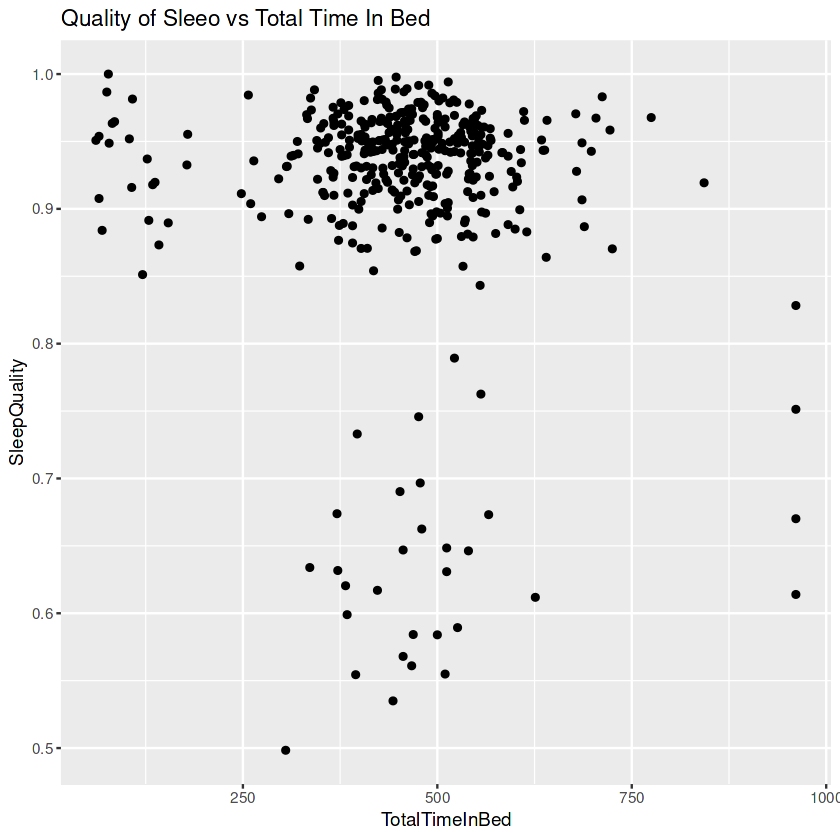

In [278]:
ggplot(data=activity_sleep, aes(x=TotalTimeInBed, y=SleepQuality)) + geom_point() + labs(title="Quality of Sleeo vs Total Time In Bed")

In the above plot we can see that there is somewhat negative correlation between Sleep Quality and Total time in bed. in addition, majority of entries with poor sleep quality 

**5.1.2 Correlation between VeryActiveMinutes and sleep quality**

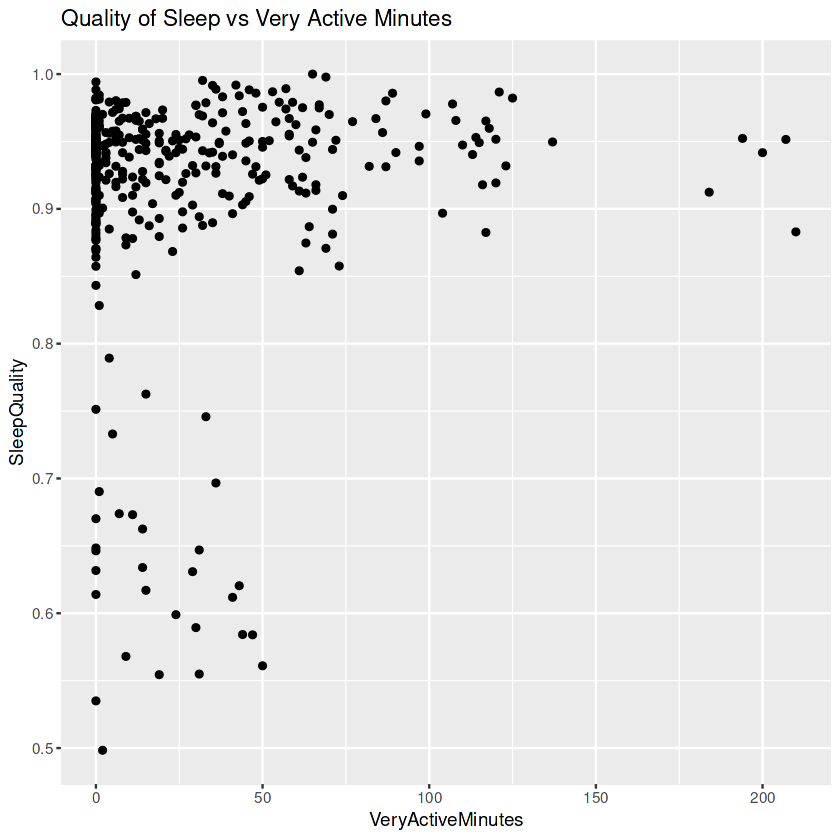

In [279]:
ggplot(data=activity_sleep, aes(x=VeryActiveMinutes, y=SleepQuality)) + geom_point() + labs(title="Quality of Sleep vs Very Active Minutes")

Although, there seem to be no correlation, majority of entries with low sleep quality lies between o and 50 very active minutes.

**5.1.3. Correlation between Sleep Quality and FairlyActiveMinutes** 

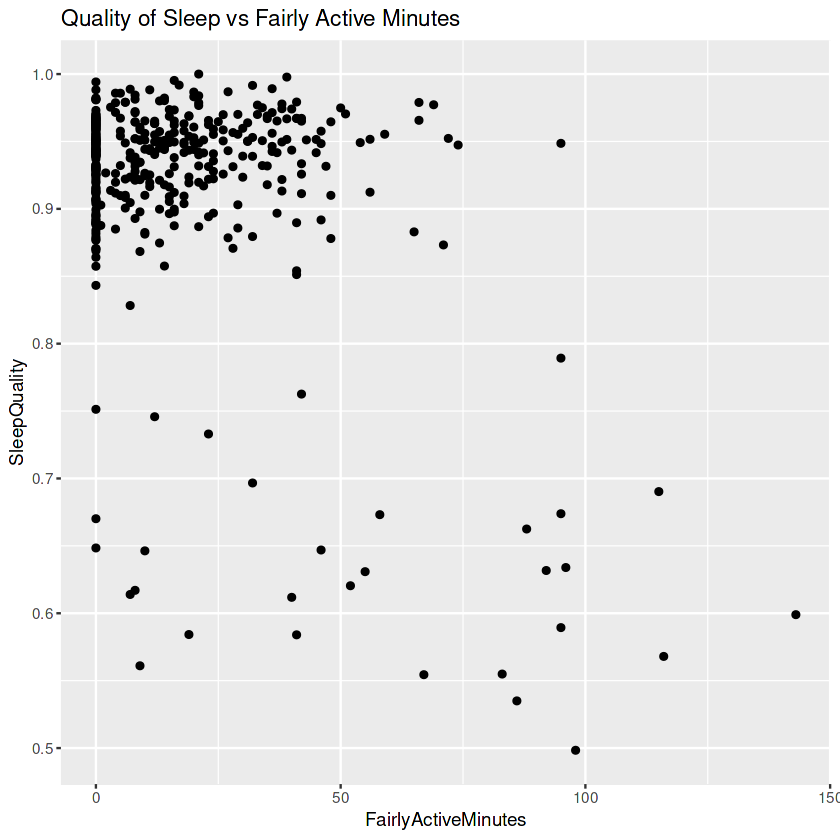

In [280]:
ggplot(data=activity_sleep, aes(x=FairlyActiveMinutes, y=SleepQuality)) + geom_point() + labs(title="Quality of Sleep vs Fairly Active Minutes")

**5.1.3.1. Pearson's correlation coefficient**

In [281]:
cor(activity_sleep$FairlyActiveMinutes, activity_sleep$SleepQuality)

[1] -0.4458431

**5.1.3.2. Significance Test**

In [282]:
cor.test(activity_sleep$FairlyActiveMinutes, activity_sleep$SleepQuality)


	Pearson's product-moment correlation

data:  activity_sleep$FairlyActiveMinutes and activity_sleep$SleepQuality
t = -10.061, df = 408, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.5202276 -0.3647450
sample estimates:
       cor 
-0.4458431 


There is moderate negative correlation between fairly active minutes and sleep quality. It can be concluded that people with higher fairly active minutes tend to have poor sleep quality.

**5.1.4. correlation between Sleep Quality and Calories burned**

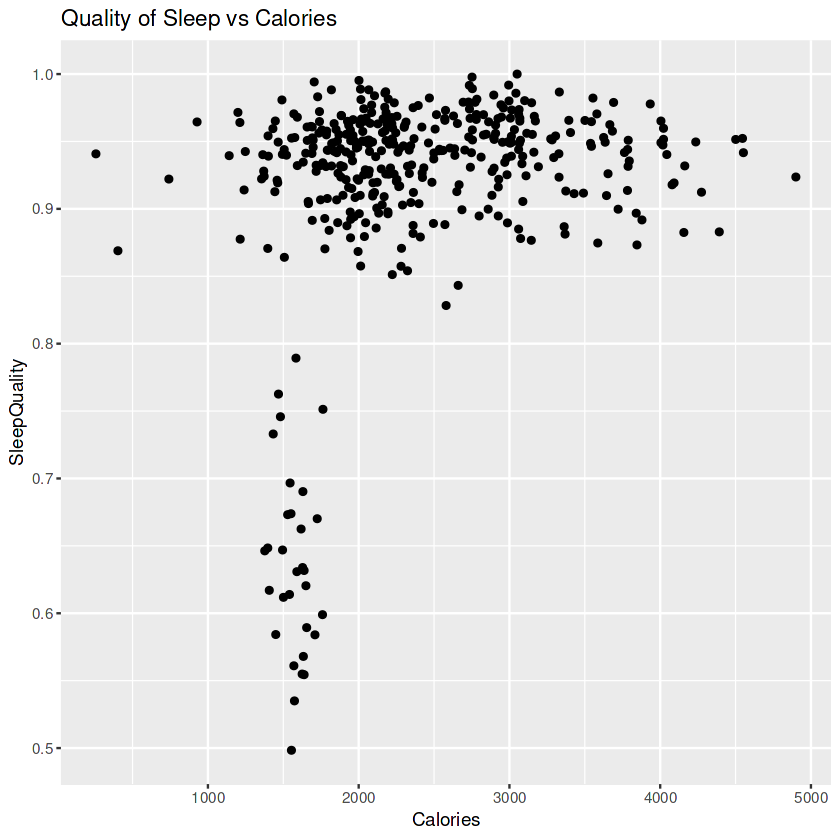

In [283]:
ggplot(data=activity_sleep, aes(x=Calories, y=SleepQuality)) + geom_point() + labs(title="Quality of Sleep vs Calories")

**5.1.4.1. Pearson's correlation coefficient**

In [284]:
cor(activity_sleep$Calories, activity_sleep$SleepQuality)

[1] 0.2948618

**5.1.4.2. Significant Test**

In [285]:
cor.test(activity_sleep$Calories, activity_sleep$SleepQuality)


	Pearson's product-moment correlation

data:  activity_sleep$Calories and activity_sleep$SleepQuality
t = 6.233, df = 408, p-value = 1.142e-09
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2038353 0.3808338
sample estimates:
      cor 
0.2948618 


There is weak positive correlation between sleep quality and calories burnes.

# 5.2.  Mean values of variables for individuals

We will use group by function to find average for each individual. This will help us gather data of individual average for each variable.

In [286]:
daily_average <- daily_activity_sleep %>%
  group_by(Id) %>%
  summarise (mean_sleep_quality = mean(TotalMinutesAsleep/TotalTimeInBed), 
mean_total_steps = mean(TotalSteps), mean_very_active_minutes = 
    mean(VeryActiveMinutes),mean_calories = mean(Calories),
    mean_sedentary_time= mean(SedentaryMinutes), mean_total_sleep = 
             mean(TotalMinutesAsleep), mean_total_time = mean(TotalTimeInBed), mean_fairly_active_minutes = mean(FairlyActiveMinutes))
head(daily_average)

Id,mean_sleep_quality,mean_total_steps,mean_very_active_minutes,mean_calories,mean_sedentary_time,mean_total_sleep,mean_total_time,mean_fairly_active_minutes
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,0.9363853,12405.680,37.9200000,1872.280,759.2800,360.2800,383.2000,20.2800000
1644430081,0.8820404,7967.750,2.5000000,2977.750,920.5000,294.0000,346.0000,19.5000000
1844505072,0.6784599,3477.000,0.0000000,1676.333,443.3333,652.0000,961.0000,2.3333333
1927972279,0.9470081,1490.000,0.0000000,2316.200,977.2000,417.0000,437.8000,0.0000000
2026352035,0.9413414,5618.679,0.1071429,1540.786,653.9643,506.1786,537.6429,0.2857143
2320127002,0.8840580,5079.000,0.0000000,1804.000,1129.0000,61.0000,69.0000,0.0000000


In [287]:
Mean_Sleep_Quality <- daily_average %>%
arrange(mean_sleep_quality)
View(Mean_Sleep_Quality)


Id,mean_sleep_quality,mean_total_steps,mean_very_active_minutes,mean_calories,mean_sedentary_time,mean_total_sleep,mean_total_time,mean_fairly_active_minutes
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3977333714,0.6336691,11218.000,19.8214286,1560.393,716.2143,293.6429,461.1429,61.2857143
1844505072,0.6784599,3477.000,0.0000000,1676.333,443.3333,652.0000,961.0000,2.3333333
1644430081,0.8820404,7967.750,2.5000000,2977.750,920.5000,294.0000,346.0000,19.5000000
2320127002,0.8840580,5079.000,0.0000000,1804.000,1129.0000,61.0000,69.0000,0.0000000
4558609924,0.9071277,8139.000,19.8000000,2197.000,1028.4000,127.6000,140.0000,25.2000000
2347167796,0.9103704,8533.200,9.2000000,1971.333,628.4000,446.8000,491.3333,16.1333333
5553957443,0.9152073,8612.581,23.4193548,1875.677,668.3548,463.4839,505.8710,13.0000000
8378563200,0.9175084,8717.710,58.6774194,3436.581,716.1290,445.1290,485.9355,10.2580645
4445114986,0.9253889,4756.179,6.4285714,2183.143,787.3214,385.1786,416.8214,1.7142857


In [288]:
Individual_Score <- Mean_Sleep_Quality

**5.2.1. Correlation between indvidual user's sleep quality and Very active minutes**

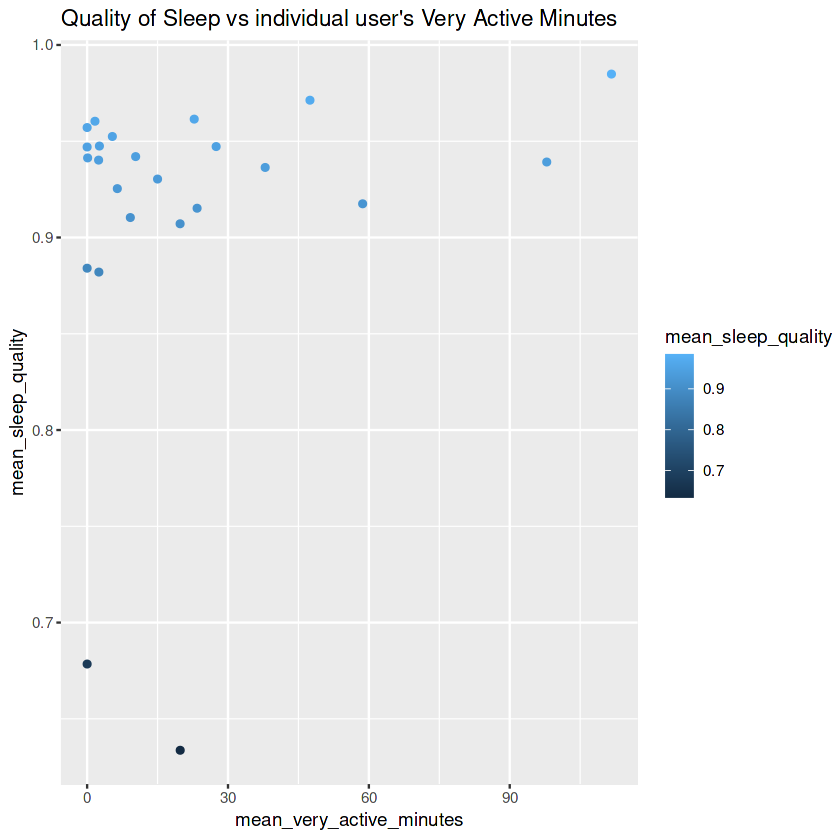

In [289]:
ggplot(data=Individual_Score, aes(x=mean_very_active_minutes, y=mean_sleep_quality)) + 
  geom_point(aes(color=mean_sleep_quality))  + labs(title="Quality of Sleep vs individual user's Very Active Minutes")

**5.2.1.1. Pearson's coefficient**

In [290]:
cor(Individual_Score$mean_very_active_minutes, Individual_Score$mean_sleep_quality)

[1] 0.2067359

**5.2.1.2. Significance Test**

In [291]:
cor.test(Individual_Score$mean_very_active_minutes, Individual_Score$mean_sleep_quality)


	Pearson's product-moment correlation

data:  Individual_Score$mean_very_active_minutes and Individual_Score$mean_sleep_quality
t = 0.99109, df = 22, p-value = 0.3324
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.2145539  0.5631664
sample estimates:
      cor 
0.2067359 


The above scatter plot suggests that there is weak positive correlation between individual's sleep quality and their very active minutes; however, significance test shows this correlation to not be significant. Therefore, it can be assumed that there is no real correlation.
As we can see the two data points with low sleep quality also have very low very active minutes. Although, we can not conclude anything based on this;however, this does suggest that those people with poor sleep quality spent very less time in intense activity.

**5.2.2. Correlation between indvidual user's calories burned and Sleep Quality**

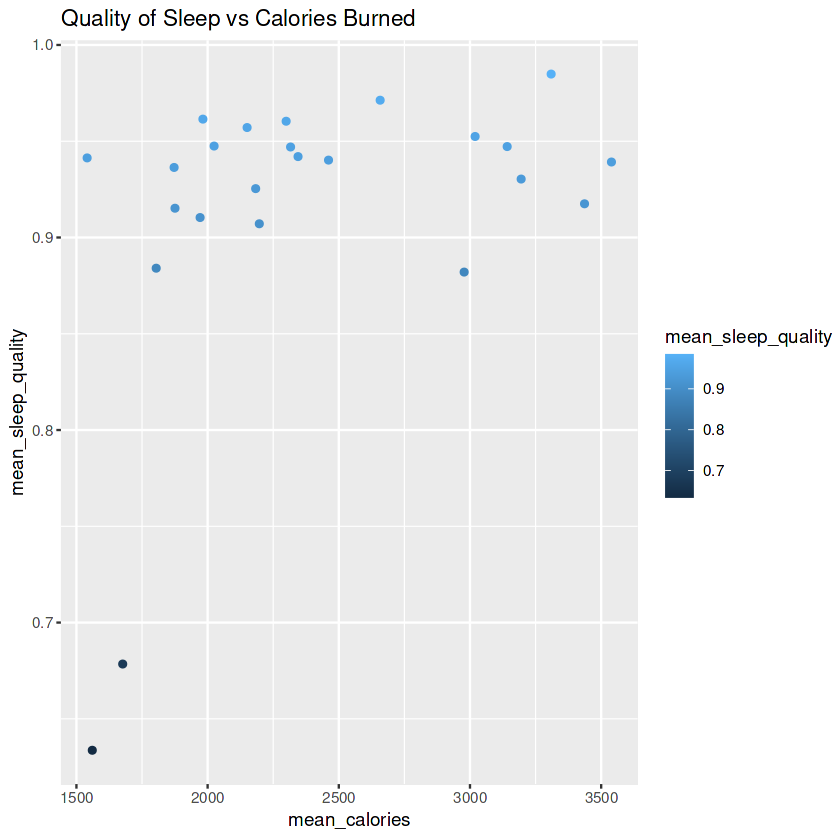

In [292]:
ggplot(data=Individual_Score, aes(x=mean_calories, y=mean_sleep_quality)) + 
  geom_point(aes(color=mean_sleep_quality))  + labs(title="Quality of Sleep vs Calories Burned")

**5.2.2.1. Pearson's coefficient**

In [293]:
cor(Individual_Score$mean_calories, Individual_Score$mean_sleep_quality)

[1] 0.4179199

**5.2.2.2. Significance Test**

In [294]:
cor.test(Individual_Score$mean_calories, Individual_Score$mean_sleep_quality)


	Pearson's product-moment correlation

data:  Individual_Score$mean_calories and Individual_Score$mean_sleep_quality
t = 2.1577, df = 22, p-value = 0.04214
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.01746811 0.70282851
sample estimates:
      cor 
0.4179199 


These results suggests that there is a moderate positive relationship between calories burned and sleep quality. Therefore, it can be concluded that the sleep quality tend to improve as we burn more calories through activity. 
In this plot also we can see the sililar phenomena as previous plot, two data points with low sleep quality also have very low calories burned. This does suggest that the individuals with poor sleep quality do not participate in much physical activity.

# 6. Conclusion****

The dataset we used in this analysis may not provide accurate conclusion as the sample size for both data set was quite small. Also, the validity of data may also be in question as we are trying to use this data to create marketing stretegy; however, data available may not be useful enough as it have no demographics information.

That being said, data does provide same great insighs on people's activity and sleep patterns and we might be able to use this information to help create a marketing strategy. As we have seen during the analysis, sleep quality is correlated with calories burned and time spent on different intensities of activity.

As we can see, for individual the users, the sleep quality may be connected to calories burned during the day and high intensity of physical activity. This suggests that individuals who are more active and burn more calories during the day tend to experience better sleep quality. Therefore, active lifestyles might contribute to deeper or longer sleep, which supports overall well-being.

# Marketing Strategy Recommendations

* Promote the connection between activity and sleep: Position Bellabeat’s products as tools not just for fitness, but also for enhancing sleep quality.

* Feature sleep improvement challenges: Encourage users to participate in daily or weekly activity challenges that reward improvements in sleep quality.

* Personalized tips in the app: Use the app to send users suggestions like "Walk an extra 2,000 steps today to improve tonight’s sleep!"

* Content marketing: Publish blogs, newsletters, or social media posts explaining how burning extra calories can significantly impact sleep quality.